Capstone

# import data

In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import pandas as pd
df = pd.read_csv('WBDevelopmentIndicators.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.530494,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422136 entries, 0 to 422135
Data columns (total 63 columns):
Country Name      422136 non-null object
Country Code      422136 non-null object
Indicator Name    422136 non-null object
Indicator Code    422136 non-null object
1960              38296 non-null float64
1961              42017 non-null float64
1962              44198 non-null float64
1963              44084 non-null float64
1964              44611 non-null float64
1965              47305 non-null float64
1966              46902 non-null float64
1967              48633 non-null float64
1968              48209 non-null float64
1969              50011 non-null float64
1970              92892 non-null float64
1971              99126 non-null float64
1972              101898 non-null float64
1973              101523 non-null float64
1974              102838 non-null float64
1975              106739 non-null float64
1976              108656 non-null float64
1977              11198

In [16]:
df.isna().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960              383840
1961              380119
1962              377938
1963              378052
1964              377525
1965              374831
1966              375234
1967              373503
1968              373927
1969              372125
1970              329244
1971              323010
1972              320238
1973              320613
1974              319298
1975              315397
1976              313480
1977              310148
1978              310568
1979              309765
1980              304918
1981              303006
1982              301802
1983              302024
1984              301222
1985              300049
                   ...  
1989              296332
1990              271853
1991              266794
1992              262844
1993              261485
1994              259336
1995              251590
1996              251332
1997              250255


In [5]:
df.columns = [column.replace(" ", "_") for column in df.columns]

In [42]:
df['Indicator_Code'].nunique()


1599

In [6]:
ChinaIndia_subset = df.query('Country_Name == "China" or Country_Name == "India"')
Electricity_subset = ChinaIndia_subset.query('Indicator_Code == "EG.ELC.ACCS.ZS"')
Electricity_subset.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
140715,China,CHN,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.115646,99.7,99.748726,99.916382,99.983116,99.998489,100.0,100.000000,NaN,NaN
217467,India,IND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,75.000000,76.3,67.600000,79.900000,79.599113,81.239510,88.0,84.526817,NaN,NaN


In [7]:
Electricity_subset2 = Electricity_subset.drop(Electricity_subset.columns[[0,1,2,3]], axis=1).transpose()
Electricity_subset2.columns = ["China", "India"]
Electricity_subset2

,China,India
1960,NaN,NaN
1961,NaN,NaN
1962,NaN,NaN
1963,NaN,NaN
1964,NaN,NaN
1965,NaN,NaN
1966,NaN,NaN
1967,NaN,NaN
1968,NaN,NaN
1969,NaN,NaN


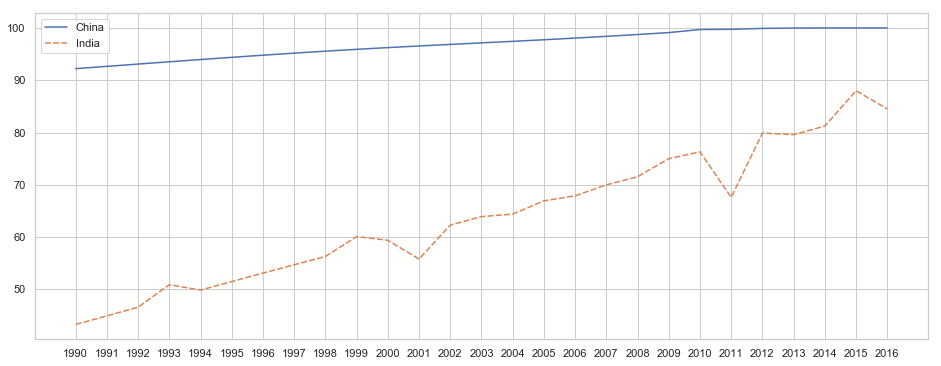

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=Electricity_subset2)

In [34]:
Electricity = df.query('Indicator_Code == "EG.ELC.ACCS.ZS"')
Electricity.head(2)

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
1602,Caribbean small states,CSS,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,92.368681,93.114511,92.677095,93.625323,94.672223,95.557923,95.568684,96.016309,NaN,NaN


In [35]:
Electricity.set_index('Country_Name')
Electricity.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
1602,Caribbean small states,CSS,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,92.368681,93.114511,92.677095,93.625323,94.672223,95.557923,95.568684,96.016309,NaN,NaN
3201,Central Europe and the Baltics,CEB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4800,Early-demographic dividend,EAR,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,78.682380,79.455104,76.450537,82.264495,82.585641,83.534424,86.972615,86.751627,NaN,NaN
6399,East Asia & Pacific,EAS,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,94.988562,95.496184,95.818281,96.226282,96.446001,96.589744,96.872611,96.914214,NaN,NaN


In [36]:
Electricity = Electricity.drop(Electricity.columns[[1,2,3]], axis=1).transpose()
Electricity.head()

,3,1602,3201,4800,6399,7998,9597,11196,12795,14394,...,406149,407748,409347,410946,412545,414144,415743,417342,418941,420540
Country_Name,Arab World,Caribbean small states,Central Europe and the Baltics,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (excluding high income),East Asia & Pacific (IDA & IBRD countries),Euro area,Europe & Central Asia,Europe & Central Asia (excluding high income),...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
new_header = Electricity.iloc[0] #grab the first row for the header
Electricity = Electricity[1:] #take the data less the header row
Electricity.columns = new_header #set the header row as the df header

Electricity.head()

Country_Name,Arab World,Caribbean small states,Central Europe and the Baltics,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (excluding high income),East Asia & Pacific (IDA & IBRD countries),Euro area,Europe & Central Asia,Europe & Central Asia (excluding high income),...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
Electricity.columns = [column.replace(" ", "_") for column in Electricity.columns]

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=Electricity)

ValueError: These `style` levels are missing dashes: {'Uzbekistan', 'Vanuatu', 'South_Africa', 'Liberia', 'Chile', 'El_Salvador', 'Lao_PDR', 'Israel', 'Europe_&_Central_Asia', 'IDA_only', 'Djibouti', 'Egypt,_Arab_Rep.', 'Eritrea', 'Tonga', 'Romania', 'Pakistan', 'Algeria', 'Europe_&_Central_Asia_(IDA_&_IBRD_countries)', 'South_Asia_(IDA_&_IBRD)', 'Eswatini', 'Monaco', 'Late-demographic_dividend', 'Venezuela,_RB', 'Cameroon', 'Haiti', 'United_States', 'Latin_America_&_Caribbean_(excluding_high_income)', 'Nigeria', 'Antigua_and_Barbuda', 'Middle_East_&_North_Africa_(IDA_&_IBRD_countries)', 'Singapore', 'British_Virgin_Islands', 'Guyana', 'Sao_Tome_and_Principe', 'Sierra_Leone', 'St._Martin_(French_part)', 'Bhutan', 'Guatemala', 'Mali', 'Nepal', 'Cayman_Islands', 'Latin_America_&_the_Caribbean_(IDA_&_IBRD_countries)', 'Mauritius', 'Samoa', 'Estonia', 'Lithuania', 'Tajikistan', 'Gibraltar', 'Sudan', 'Post-demographic_dividend', 'San_Marino', 'New_Caledonia', 'Poland', 'Sub-Saharan_Africa', 'Syrian_Arab_Republic', 'Spain', 'Slovak_Republic', 'Channel_Islands', 'Bangladesh', 'Saudi_Arabia', 'Malta', 'Qatar', 'Austria', 'Switzerland', 'Canada', 'Cambodia', 'Trinidad_and_Tobago', 'Morocco', 'Denmark', 'Colombia', 'Albania', 'China', 'Luxembourg', 'South_Sudan', 'Isle_of_Man', 'Small_states', 'Japan', 'Hong_Kong_SAR,_China', 'Fiji', 'Zimbabwe', 'Heavily_indebted_poor_countries_(HIPC)', 'Guinea', 'Palau', 'Belgium', 'Costa_Rica', 'Latvia', 'Lebanon', 'Greenland', 'Slovenia', 'North_America', 'Norway', 'Cabo_Verde', 'Belarus', 'Not_classified', 'Cyprus', 'Sint_Maarten_(Dutch_part)', 'Jordan', 'Honduras', 'Mauritania', 'Pacific_island_small_states', "Cote_d'Ivoire", 'Least_developed_countries:_UN_classification', 'Marshall_Islands', 'St._Lucia', 'Malaysia', 'Sri_Lanka', 'Finland', 'Bulgaria', 'Jamaica', 'American_Samoa', 'Seychelles', 'Guam', 'Kazakhstan', 'Oman', 'Iran,_Islamic_Rep.', 'Sweden', 'Tunisia', 'Korea,_Rep.', 'Uganda', 'Czech_Republic', 'Senegal', 'Tanzania', 'St._Vincent_and_the_Grenadines', 'Bolivia', 'Hungary', 'Mozambique', 'Ecuador', 'Andorra', 'Liechtenstein', 'Fragile_and_conflict_affected_situations', 'St._Kitts_and_Nevis', 'Sub-Saharan_Africa_(IDA_&_IBRD_countries)', 'Pre-demographic_dividend', 'Northern_Mariana_Islands', 'IDA_total', 'Middle_income', 'Montenegro', 'IBRD_only', 'Bahamas,_The', 'Guinea-Bissau', 'IDA_&_IBRD_total', 'Malawi', 'Greece', 'Kenya', 'India', 'Aruba', 'Maldives', 'Euro_area', 'French_Polynesia', 'East_Asia_&_Pacific_(IDA_&_IBRD_countries)', 'Lesotho', 'Chad', 'Kiribati', 'Timor-Leste', 'Angola', 'Bahrain', 'Central_African_Republic', 'Azerbaijan', 'Serbia', 'Ghana', 'Croatia', 'Vietnam', 'Yemen,_Rep.', 'Kosovo', 'Rwanda', 'United_Arab_Emirates', 'Europe_&_Central_Asia_(excluding_high_income)', 'Libya', 'Netherlands', 'North_Macedonia', 'United_Kingdom', 'Botswana', 'Dominica', 'Italy', 'Russian_Federation', 'Turks_and_Caicos_Islands', 'Virgin_Islands_(U.S.)', 'Namibia', 'Somalia', 'Mongolia', 'Bermuda', 'Ireland', 'Dominican_Republic', 'Iceland', 'High_income', 'Argentina', 'Panama', 'Middle_East_&_North_Africa', 'Portugal', 'Mexico', 'Comoros', 'France', 'Gabon', 'Ethiopia', 'Afghanistan', 'Papua_New_Guinea', 'Indonesia', 'Macao_SAR,_China', 'Micronesia,_Fed._Sts.', 'Kyrgyz_Republic', 'Uruguay', 'Middle_East_&_North_Africa_(excluding_high_income)', 'Armenia', 'Solomon_Islands', 'Brunei_Darussalam', 'Iraq', 'Burundi', 'Moldova', 'Faroe_Islands', 'Sub-Saharan_Africa_(excluding_high_income)', 'Australia', 'Congo,_Dem._Rep.', 'Upper_middle_income', 'Myanmar', 'Philippines', 'Equatorial_Guinea', 'Barbados', 'Kuwait', 'Belize', 'Low_income', 'Paraguay', 'Brazil', 'West_Bank_and_Gaza', 'Bosnia_and_Herzegovina', 'Germany', 'Togo', 'South_Asia', 'Nicaragua', 'Thailand', 'Nauru', 'Other_small_states', 'Turkmenistan', 'Georgia', 'Tuvalu', 'New_Zealand', 'Niger', 'Zambia', 'Ukraine', 'Puerto_Rico', 'Gambia,_The', 'IDA_blend', 'Congo,_Rep.', 'Lower_middle_income', 'World', 'Turkey', 'European_Union', 'Low_&_middle_income', 'OECD_members', 'Korea,_Dem._People’s_Rep.', 'Grenada', 'Madagascar', 'Cuba', 'Suriname', 'Burkina_Faso', 'Benin', 'Curacao', 'Latin_America_&_Caribbean', 'Peru'}

<Figure size 1152x432 with 0 Axes>

# EDA

# Preprocessing & Feature Engineering

# K Nearest Neighbors Model

## Create training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.25, random_state=42)

## Normalize the data

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=df.columns)
scaled_df_train.head()

## Fit a KNN model

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

## Evaluate the Model

In [ ]:
# Import the necessary functions
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [ ]:
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

## Improve model performance

# K Means Model